In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import numpy as np
tf.random.set_seed(1234)

11490434/11490434 [==============================] - 0s 0us/step
The number is: 3


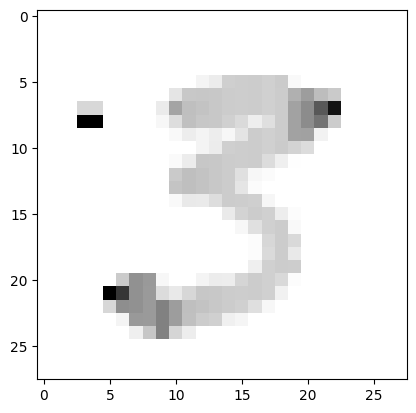

(60000, 28, 28)
(10000, 28, 28)
Number of images in x_train: 60000
Number of images in x_test: 10000
(60000, 784)
(10000, 784)


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
image_index = 49 # Can select anything upto 59,999 for y_train and upto 9999 for y_test
print('The number is:',y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

print(x_train.shape)
print(x_test.shape)
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

In [5]:
### The above part is same for all models
### PCA Model
pc = 2 # Number of principal components
avg = x_train.mean(axis=0) # Calculating mean along the columns
diff = x_train - avg
p,q,r = np.linalg.svd(diff, full_matrices=False)
Zpca = np.dot(diff, r.transpose())
Rpca = np.dot(Zpca[:,:pc], r[:pc,:]) + avg
err = np.sum((x_train-Rpca)**2)/Rpca.shape[0]/Rpca.shape[1]
print('Reconstruction error with %d Principal Components: ' %(pc) + str(round(err,4)));

Reconstruction error with 2 Principal Components: 0.0113


Actual label is: 3


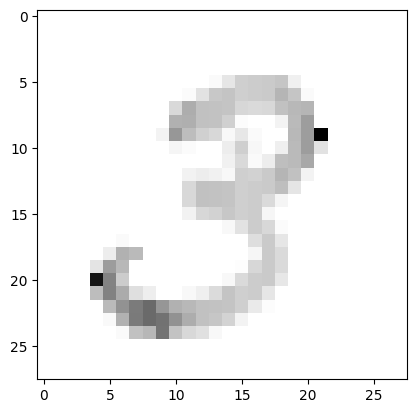

Actual label is: 3


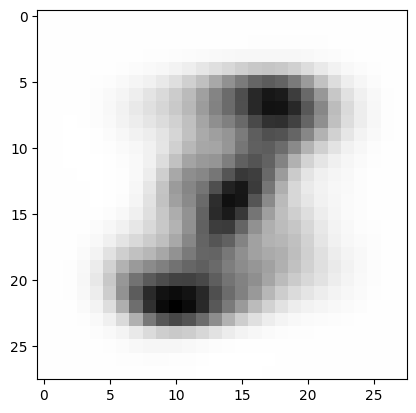

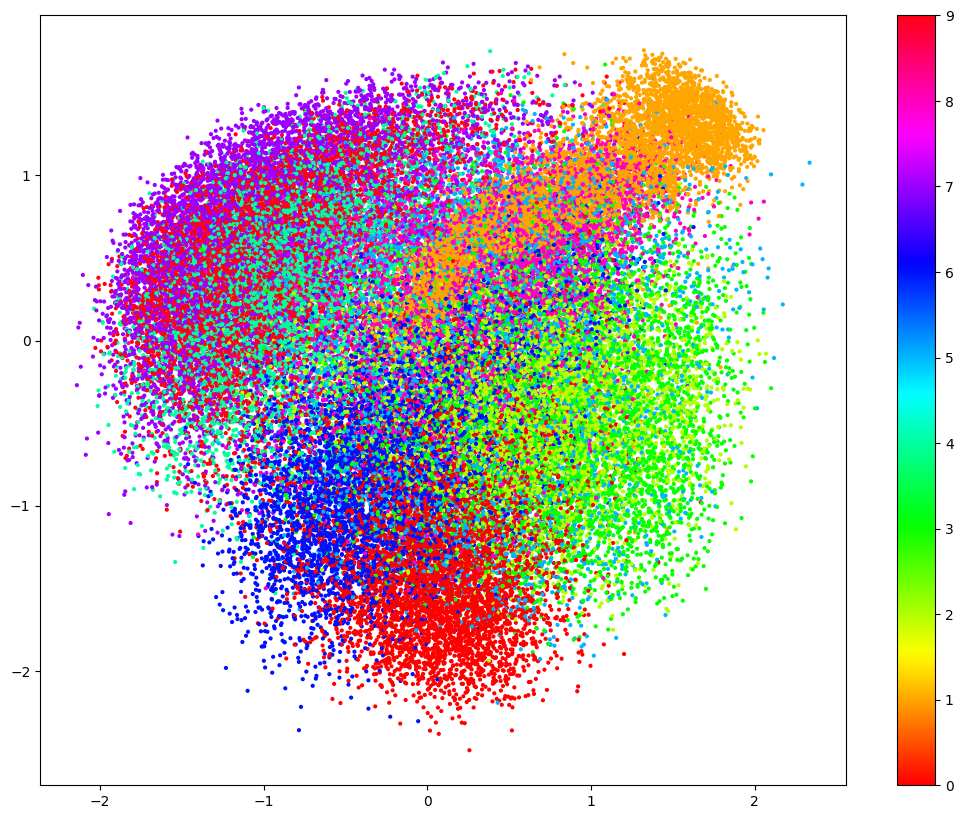

In [6]:
image_index = 5001
print('Actual label is:',y_train[image_index])
plt.imshow(x_train[image_index].reshape(28, 28),cmap='Greys')
plt.show()
image_index = 5001
print('Actual label is:',y_train[image_index])
plt.imshow(Rpca[image_index].reshape(28, 28),cmap='Greys')
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.scatter(Zpca[:,0], Zpca[:,1], s=4, c=y_train, cmap='hsv')
plt.colorbar()
plt.show()
###PCA Model ends here

In [7]:
###Linear AE Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(784,)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(2, name="bottleneck_layer1"))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dense(784))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck_layer1 (Dense)   (None, 2)                 258       
                                                                 
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 784)               402192    
                                                                 
Total params: 936466 (3.57 MB)
Trainable params: 936466 

Epoch 1/30
469/469 [==============================] - 9s 5ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 5/30
469/469 [==============================] - 3s 5ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 8/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 9/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 10/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0113 - val_loss: 0.0110

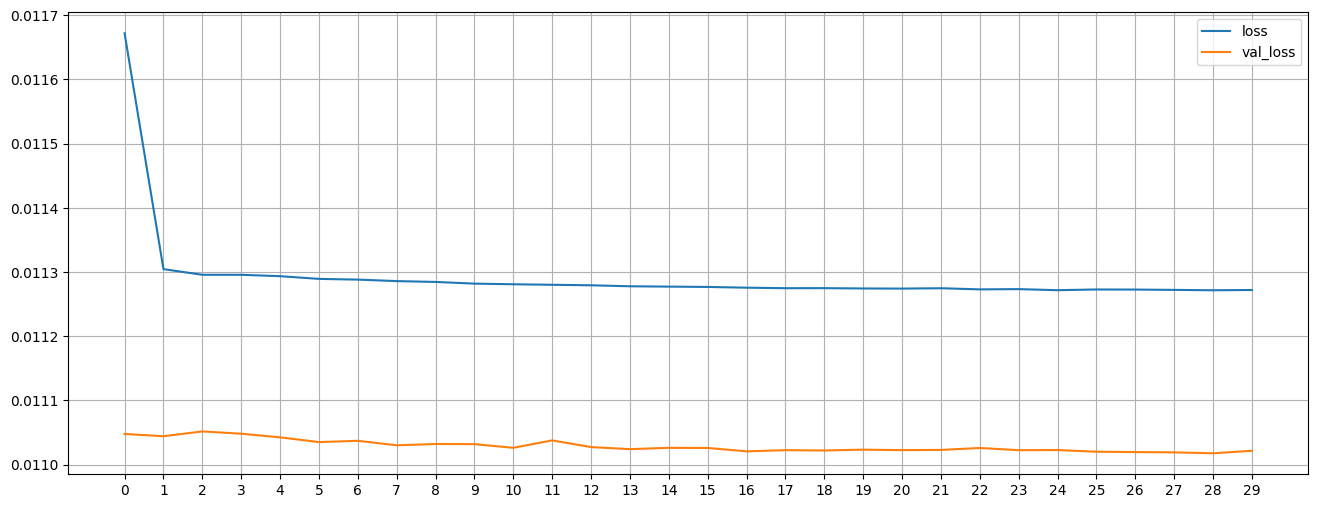

Actual label is: 3
1/1 [==============================] - 0s 96ms/step


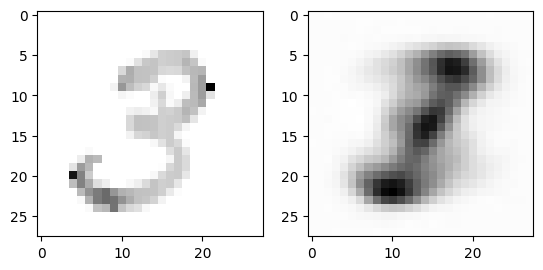

1875/1875 [==============================] - 3s 1ms/step


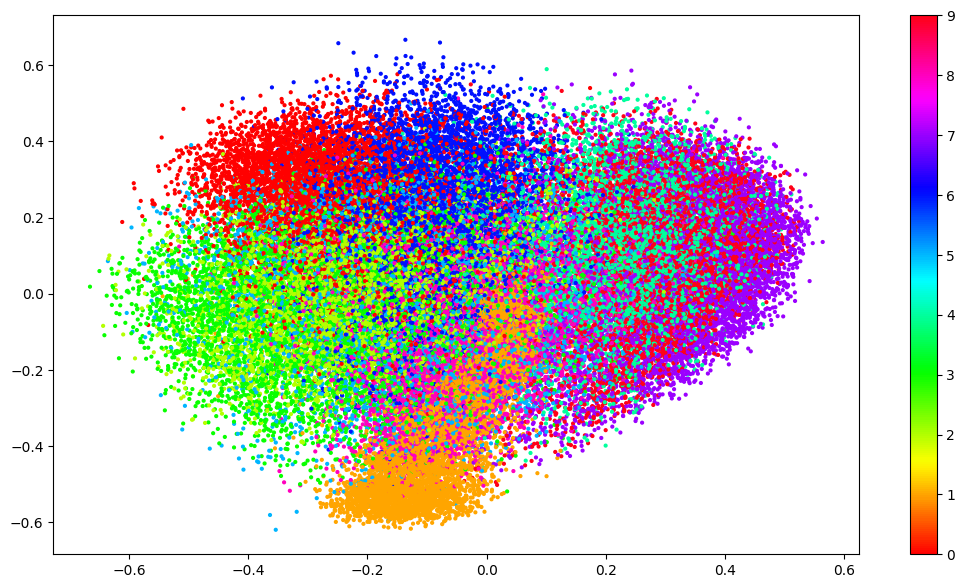

In [8]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
t=time.time()
epochs = 30
history = model.fit(x_train, x_train, batch_size=128, epochs=epochs, validation_data=(x_test, x_test))
print('Training time in seconds: %s' % -(t - time.time()))

plt.figure(figsize=(16,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(np.arange(0, epochs, 1.0))
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.grid(True)
plt.show()
image_index = 5001
print('Actual label is:',y_train[image_index])
plt.figure()
plt.subplot(121)
plt.imshow(x_train[image_index].reshape(28, 28),cmap='Greys')

plt.subplot(122)
pred = model.predict(x_train[image_index].reshape(1, 784))
plt.imshow(pred.reshape(28, 28),cmap='Greys')
plt.show()
bottleneck_layer = tf.keras.models.Model(model.input, model.get_layer("bottleneck_layer1").output)
bottleneck_layer = bottleneck_layer.predict(x_train)
plt.figure(figsize=(13,7))
plt.scatter(bottleneck_layer[:,0], bottleneck_layer[:,1], s=4, c=y_train, cmap='hsv')
plt.colorbar()
plt.show()

In [9]:
### Nonlinear AE Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.relu, name="bottleneck_layer1"))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(784, activation=tf.nn.sigmoid))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck_layer1 (Dense)   (None, 2)                 258       
                                                                 
 dense_7 (Dense)             (None, 128)               384       
                                                                 
 dense_8 (Dense)             (None, 512)               66048     
                                                                 
 dense_9 (Dense)             (None, 784)               402192    
                                                                 
Total params: 936466 (3.57 MB)
Trainable params: 93646

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
t=time.time()
epochs = 30
history = model.fit(x_train, x_train, batch_size=128, epochs=epochs, validation_data=(x_test, x_test))
print('Training time in seconds: %s' % -(t - time.time()))

plt.figure(figsize=(16,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(np.arange(0, epochs, 1.0))
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.grid(True)
plt.show()
image_index = 5001
print('Actual label is:',y_train[image_index])
plt.figure()
plt.subplot(121)
plt.imshow(x_train[image_index].reshape(28, 28),cmap='Greys')

plt.subplot(122)
pred = model.predict(x_train[image_index].reshape(1, 784))
plt.imshow(pred.reshape(28, 28),cmap='Greys')
plt.show()
bottleneck_layer = tf.keras.models.Model(model.input, model.get_layer("bottleneck_layer1").output)
bottleneck_layer = bottleneck_layer.predict(x_train)
plt.figure(figsize=(13,7))
plt.scatter(bottleneck_layer[:,0], bottleneck_layer[:,1], s=4, c=y_train, cmap='hsv')
plt.colorbar()
plt.show()

Epoch 1/30
469/469 [==============================] - 5s 5ms/step - loss: 0.0244 - val_loss: 0.0198
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0200 - val_loss: 0.0166
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0125 - val_loss: 0.0112
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0104 - val_loss: 0.0097
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0091 - val_loss: 0.0088
Epoch 8/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 9/30
373/469 [======================>.......] - ETA: 0s - loss: 0.0087